<a href="https://colab.research.google.com/github/chvkrsubhash/gender-age-detection/blob/main/gender_age_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
#code clause golden project

In [3]:
import cv2 as cv
import math
import time
# import argparse
from google.colab.patches import cv2_imshow

In [4]:
def getFaceBox(net, frame, conf_threshold=0.7):
    frameOpencvDnn = frame.copy()
    frameHeight = frameOpencvDnn.shape[0]
    frameWidth = frameOpencvDnn.shape[1]
    blob = cv.dnn.blobFromImage(frameOpencvDnn, 1.0, (300, 300), [104, 117, 123], True, False)

    net.setInput(blob)
    detections = net.forward()
    bboxes = []
    for i in range(detections.shape[2]):
        confidence = detections[0, 0, i, 2]
        if confidence > conf_threshold:
            x1 = int(detections[0, 0, i, 3] * frameWidth)
            y1 = int(detections[0, 0, i, 4] * frameHeight)
            x2 = int(detections[0, 0, i, 5] * frameWidth)
            y2 = int(detections[0, 0, i, 6] * frameHeight)
            bboxes.append([x1, y1, x2, y2])
            cv.rectangle(frameOpencvDnn, (x1, y1), (x2, y2), (0, 255, 0), int(round(frameHeight/150)), 8)
    return frameOpencvDnn, bboxes

faceProto = "modelNweight/opencv_face_detector.pbtxt"
faceModel = "modelNweight/opencv_face_detector_uint8.pb"

ageProto = "modelNweight/age_deploy.prototxt"
ageModel = "modelNweight/age_net.caffemodel"

genderProto = "modelNweight/gender_deploy.prototxt"
genderModel = "modelNweight/gender_net.caffemodel"

MODEL_MEAN_VALUES = (70.4263377603, 87.7689143744, 114.895847746)
ageList = ['(0-2)', '(4-6)', '(8-12)', '(15-20)', '(25-38)', '(38-43)', '(48-53)', '(60-100)']
genderList = ['Male', 'Female']

# Load network
ageNet = cv.dnn.readNet(ageModel, ageProto)
genderNet = cv.dnn.readNet(genderModel, genderProto)
faceNet = cv.dnn.readNet(faceModel, faceProto)

padding = 20

def age_gender_detector(frame):
    # Read frame
    t = time.time()
    frameFace, bboxes = getFaceBox(faceNet, frame)
    for bbox in bboxes:
        # print(bbox)
        face = frame[max(0,bbox[1]-padding):min(bbox[3]+padding,frame.shape[0]-1),max(0,bbox[0]-padding):min(bbox[2]+padding, frame.shape[1]-1)]

        blob = cv.dnn.blobFromImage(face, 1.0, (227, 227), MODEL_MEAN_VALUES, swapRB=False)
        genderNet.setInput(blob)
        genderPreds = genderNet.forward()
        gender = genderList[genderPreds[0].argmax()]
        # print("Gender Output : {}".format(genderPreds))
        print("Gender : {}, conf = {:.3f}".format(gender, genderPreds[0].max()))

        ageNet.setInput(blob)
        agePreds = ageNet.forward()
        age = ageList[agePreds[0].argmax()]
        print("Age Output : {}".format(agePreds))
        print("Age : {}, conf = {:.3f}".format(age, agePreds[0].max()))

        label = "{},{}".format(gender, age)
        cv.putText(frameFace, label, (bbox[0], bbox[1]-10), cv.FONT_HERSHEY_SIMPLEX, 0.8, (0, 255, 255), 2, cv.LINE_AA)
    return frameFace


Gender : Male, conf = 1.000
Age Output : [[1.3742783e-07 5.6280700e-05 3.4674213e-03 8.6071494e-04 9.9428409e-01
  1.2802200e-03 4.4838169e-05 6.2745517e-06]]
Age : (25-38), conf = 0.994


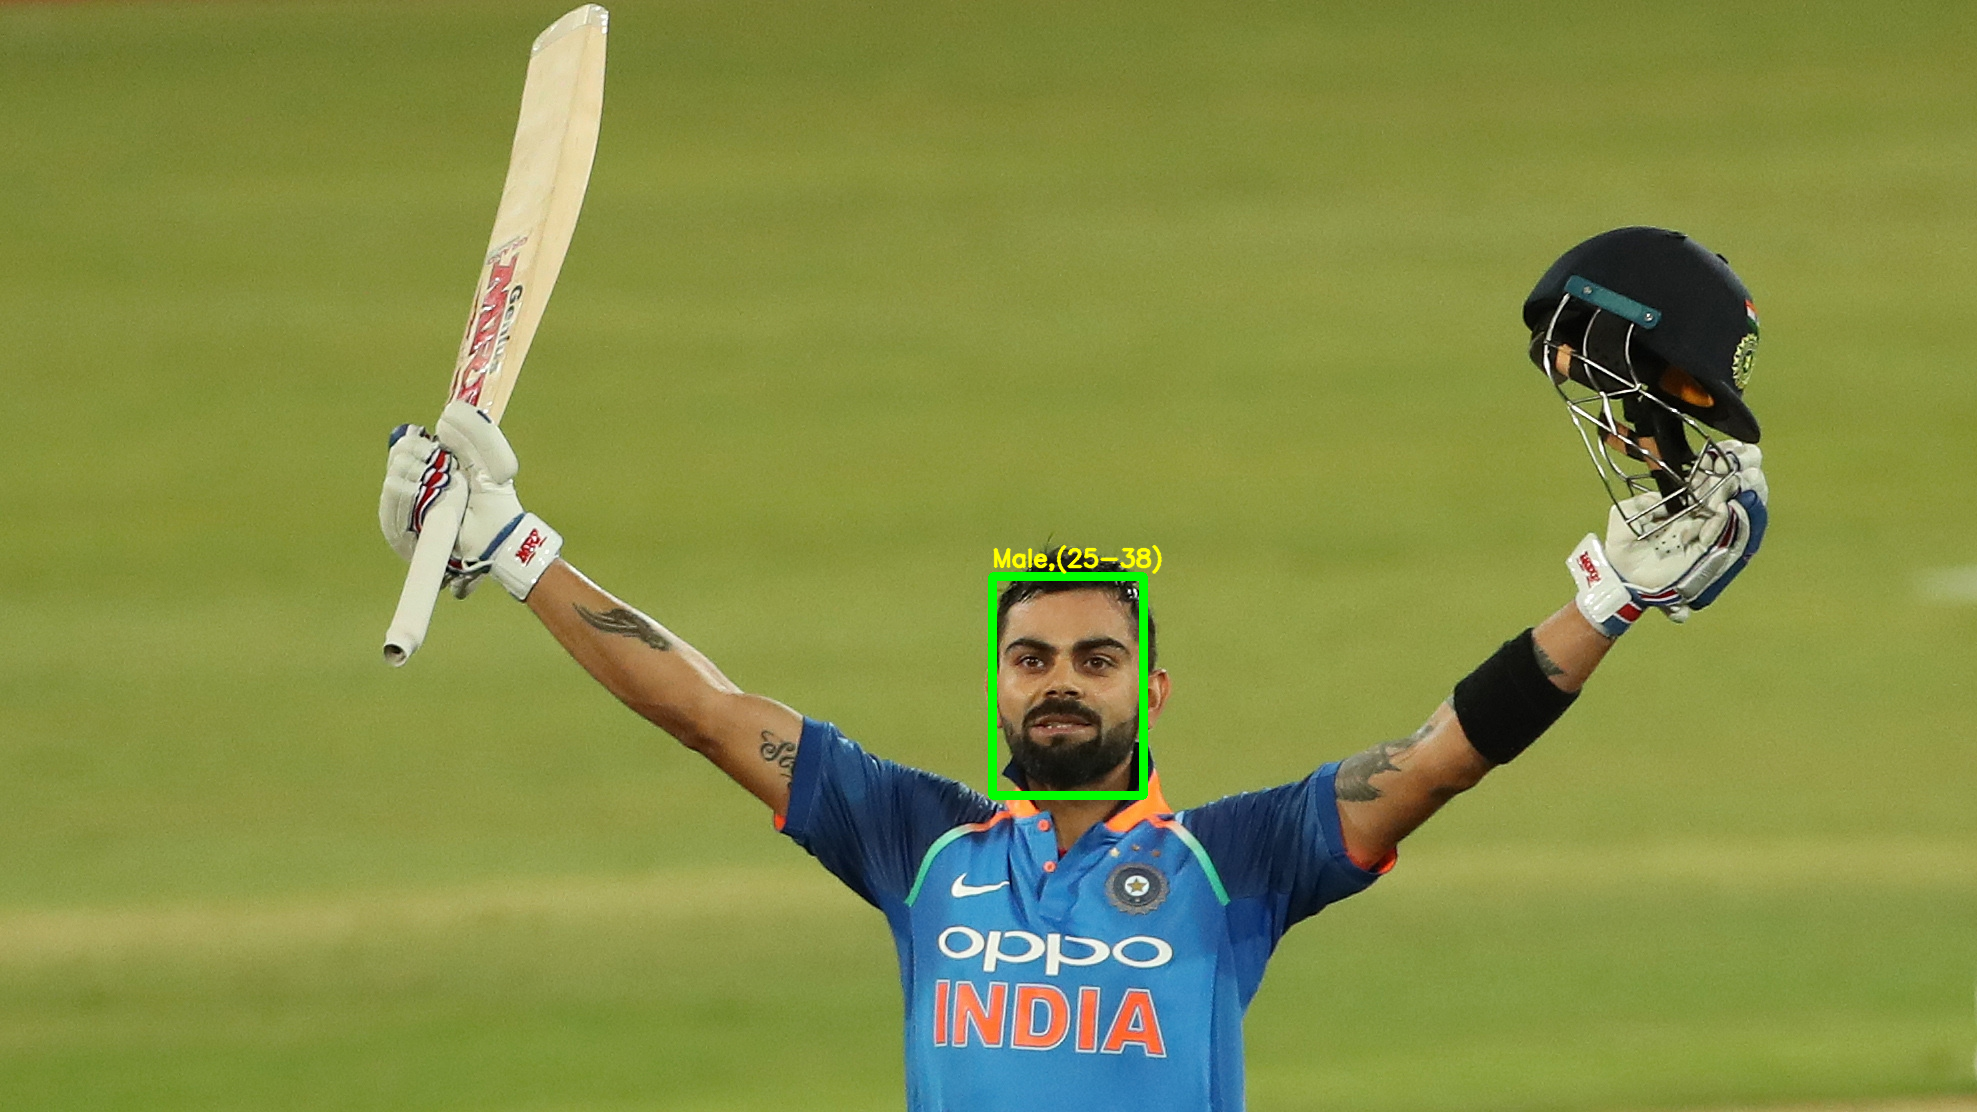

In [5]:
input = cv.imread("/content/35.jpg")
output = age_gender_detector(input)
cv2_imshow(output)

Gender : Female, conf = 1.000
Age Output : [[3.2564127e-04 4.1192581e-04 5.6733951e-02 8.4673166e-01 4.3364655e-02
  2.8892808e-02 2.2541625e-02 9.9768222e-04]]
Age : (15-20), conf = 0.847
Gender : Female, conf = 0.998
Age Output : [[1.3432893e-06 1.9262409e-04 9.9535924e-01 4.5691992e-04 3.9423048e-03
  1.0819506e-05 2.9701640e-05 7.0538158e-06]]
Age : (8-12), conf = 0.995
Gender : Female, conf = 1.000
Age Output : [[7.9428358e-04 3.8735334e-02 8.4713733e-01 2.0210965e-02 8.9582510e-02
  9.5786643e-04 2.1571235e-03 4.2467407e-04]]
Age : (8-12), conf = 0.847


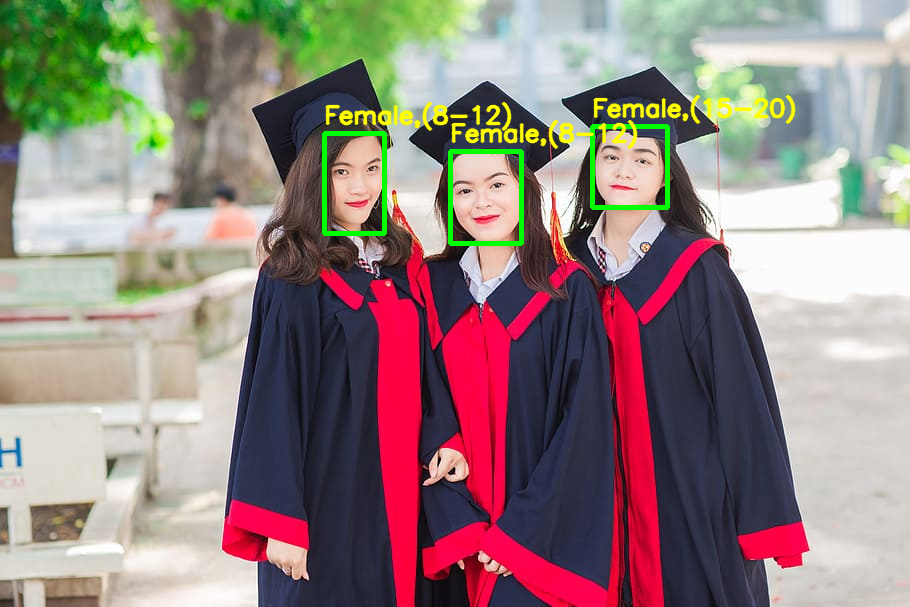

In [6]:
input = cv.imread("/content/7.jpg")
output = age_gender_detector(input)
cv2_imshow(output)

Gender : Male, conf = 1.000
Age Output : [[2.4626675e-06 7.0138849e-05 2.7534124e-01 1.1677965e-02 7.1251273e-01
  2.9592283e-04 7.4339638e-05 2.5188727e-05]]
Age : (25-38), conf = 0.713


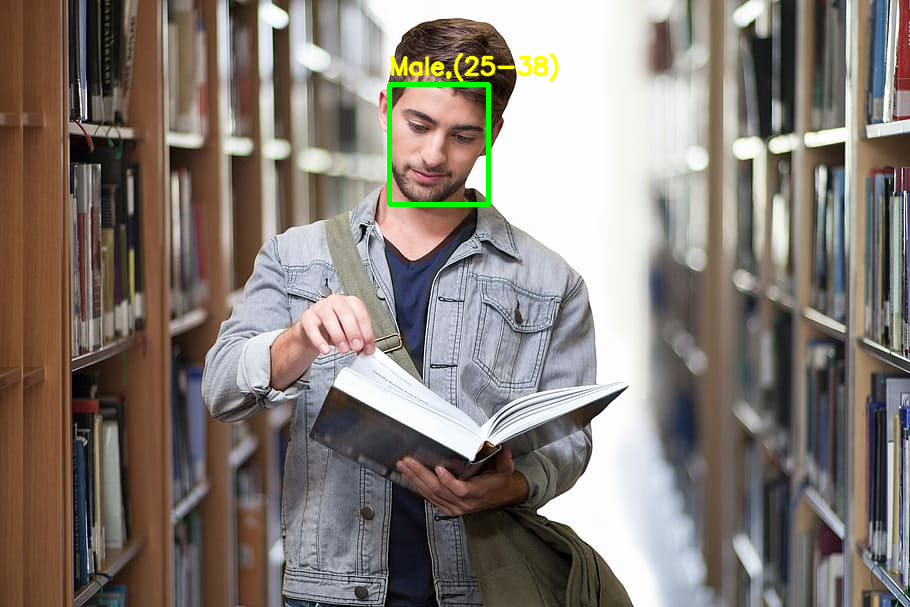

In [7]:
input = cv.imread("/content/9.jpg")
output = age_gender_detector(input)
cv2_imshow(output)